MULTIPLE LR

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error


In [2]:
df=pd.read_csv('Student_Performance.csv')

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [56]:
df["Extracurricular Activities"].replace({"Yes": 1, "No": 0}, inplace=True)
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [6]:
X = df.drop(columns=["Performance Index"])
y = df["Performance Index"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print results
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

R² Score: 0.99
Mean Absolute Error (MAE): 1.61


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print results
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

R² Score: 0.99
Mean Absolute Error (MAE): 1.63


OBSERVATION: NOT MUCH DIFFERENCE WITH CHANGE IN SPLIT

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print results
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

R² Score: 0.99
Mean Absolute Error (MAE): 1.61


OBSERVATION: NO CHANGE BY CHANGING RANDOM STATE

In [29]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define feature combinations for multiple models
feature_sets = {
    "Model 1": ["Hours Studied", "Previous Scores"],
    "Model 2": ["Extracurricular Activities", "Sleep Hours"],
    "Model 3": ["Sample Question Papers Practiced", "Previous Scores"],
}

# Train and evaluate multiple models
results = {}

for model_name, features in feature_sets.items():
    # Train model
    model = LinearRegression()
    model.fit(X_train[features], y_train)

    # Predict
    y_pred = model.predict(X_test[features])

    # Evaluate
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Store results
    results[model_name] = {"R² Score": r2, "MAE": mae}

# Print results
for model_name, metrics in results.items():
    print(f"{model_name}: R² = {metrics['R² Score']:.2f}, MAE = {metrics['MAE']:.2f}")

Model 1: R² = 0.99, MAE = 1.83
Model 2: R² = 0.00, MAE = 16.17
Model 3: R² = 0.84, MAE = 6.54


POLYNOMIAL LR

In [49]:
dataset=pd.read_csv('50_Startups.csv')
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
ct= ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])], remainder='passthrough',)
X=np.array(ct.fit_transform(X))
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)


In [50]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)

In [51]:
poly.fit(X_poly, y_train)
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y_train)

LinearRegression()

In [52]:
y_poly = poly_regressor.predict(poly.fit_transform(X_test))

In [53]:
# Evaluate the model
r2 = r2_score(y_test, y_poly)
mae = mean_absolute_error(y_test, y_poly)
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

R² Score: -10.09
Mean Absolute Error (MAE): 83247.52


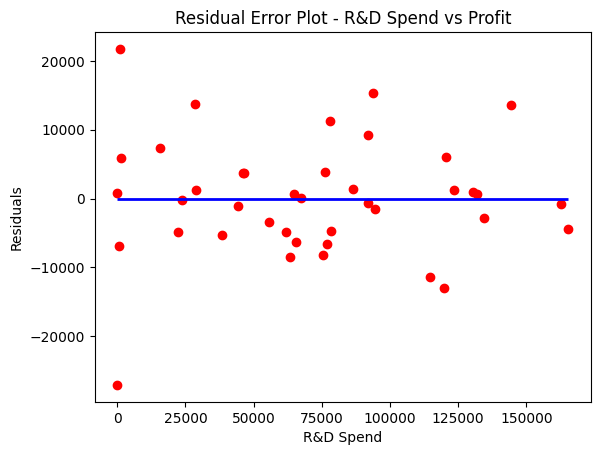

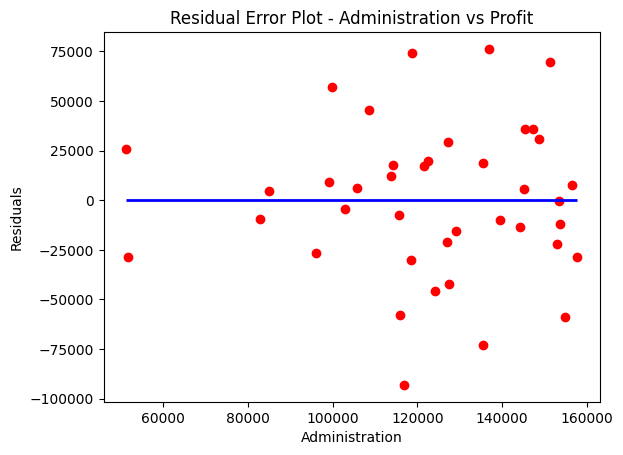

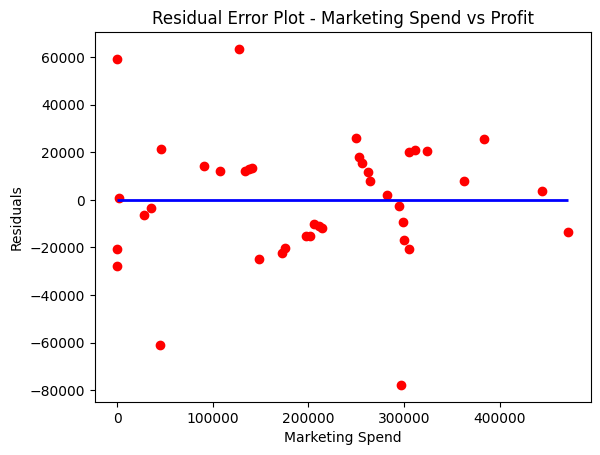

In [54]:
# List of features to loop through
features = ['R&D Spend', 'Administration', 'Marketing Spend']

# Loop through each feature to apply polynomial regression and plot residuals
for feature in features:
    X = dataset[[feature]]  # Select one feature at a time
    y = dataset['Profit']  # Target variable

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Apply PolynomialFeatures transformation (degree=3 for cubic regression)
    poly = PolynomialFeatures(degree=3)
    X_poly_train = poly.fit_transform(X_train)

    # Train Polynomial Regression model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Predict values for the training set
    y_pred_train = model.predict(X_poly_train)

    # Calculate residuals (Actual - Predicted)
    residuals = y_train - y_pred_train

    # Plot the residuals
    plt.scatter(X_train, residuals, color='red')
    plt.hlines(y=0, xmin=min(X_train.values), xmax=max(X_train.values), colors='blue', linewidth=2)
    plt.title(f'Residual Error Plot - {feature} vs Profit')
    plt.xlabel(feature)
    plt.ylabel('Residuals')
    plt.show()

OBSERVATION: With high value of degree model seemed to overfit. Wit low value of degree model seemed to underfit.


In [57]:
df.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

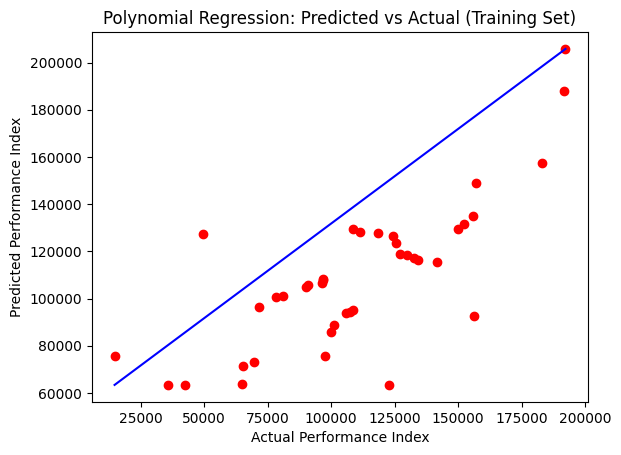

R² Score: 0.59


In [64]:
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)

# Train Polynomial Regression model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predict values for the training set
y_pred_train = model.predict(X_poly_train)

# Plotting the Polynomial Regression curve
# Since we have multiple features, we'll plot residuals or predicted vs actual values
plt.scatter(y_train, y_pred_train, color='red')
plt.plot([min(y_train), max(y_train)], [min(y_pred_train), max(y_pred_train)], color='blue')
plt.title('Polynomial Regression: Predicted vs Actual (Training Set)')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.show()

# Print the R² score to evaluate the model's performance
r2 = model.score(X_poly_train, y_train)
print(f'R² Score: {r2:.2f}')